

# Project: The Movie Database (TMDb) Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDB) is a community built movie and TV database. 
Every piece of data has been added by an amazing community dating back to 2008.

Using the Movie Database (TMDB) dataset, analysis will be carried out with the aim of finding the trends that tends to drive the Revenue of a movie. 

To achieve this, the following questions will be answered in the analysis:

- Who are the top movie directors for higher revenue generation?. 
- How does the adjusted revenue correlate with the movie popularity, runtime and average vote
- Which genre of movie leads in generating revenue?
- Who are top directors in the genre with leading revenue generation?
- Which genre is more popular with viewers?

To answer the above questions from the Movie Dataset, the following features will be used from the dataset:

- Popularity
- Director
- Runtime
- Genre
- Vote count
- Vote Average 
- Revenue Adjusted 


In [2]:
# Import packages needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Movie Database (TMDB) dataset loading and cleaning operations

### General Properties

In [4]:
# load the Movie Database (TMDB) dataset 

df_mdb = pd.read_csv('tmdb-movies.csv')

# view the first 5 rows of the loaded dataset

df_mdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Get general information about the loaded dataset

In [5]:
# list dataset columns
list_col = list(df_mdb.columns)
list_col

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [6]:
# dataset info
df_mdb.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>>From the above information gotten on the dataset. 
The dataset has 10866 rows with 21 columns. The dataset contains some null value on an overview.

Let's get the count of null values in each column in the dataset.

In [14]:
# count null in each column
df_mdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The columns in the dataset with null values are imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies.

For the Aim of this analysis, most of the columns with null are not in the features needed. Only three of our needed features have null values in their column.

>>In the data cleaning phase, we will drop all un-needed features for the analysis which will take care of most null values on the dataset. For the features needed with null, the rows will be retained as the numeric columns on this rows will be useful in the analysis.

>>Furthermore, we will also change the datatype for "release_date" from string to datatime format.

-----

### Data Cleaning 

- Removal of the following columns 'id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', and 'production_companies' as they won't be needed in our analysis.
- Change of data type for "release_date " from string to datetime

In [7]:
# Remove the unwanted columns from the dataframe
df_mdb = df_mdb.drop(['id', 'imdb_id', 'original_title', 'homepage', 
                      'tagline', 'keywords', 'overview', 'production_companies'], axis =1 )

# confirm columns are droped
df_mdb.columns


Index(['popularity', 'budget', 'revenue', 'cast', 'director', 'runtime',
       'genres', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [8]:
# change the datatype for release_date to datetime
df_mdb['release_date'] = pd.to_datetime(df_mdb['release_date'])

# confirm data type change
df_mdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10866 non-null  float64       
 1   budget        10866 non-null  int64         
 2   revenue       10866 non-null  int64         
 3   cast          10790 non-null  object        
 4   director      10822 non-null  object        
 5   runtime       10866 non-null  int64         
 6   genres        10843 non-null  object        
 7   release_date  10866 non-null  datetime64[ns]
 8   vote_count    10866 non-null  int64         
 9   vote_average  10866 non-null  float64       
 10  release_year  10866 non-null  int64         
 11  budget_adj    10866 non-null  float64       
 12  revenue_adj   10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis


###  1) Who are the top movie directors for higher revenue generation?
(Who are these directors, their features, the cast used, and their overall rating)

In [10]:
# average adjusted revenue
adj_revenue_mean = df_mdb['revenue_adj'].mean()
adj_revenue_mean

51364363.25325093

In [11]:
# get movies with adjusted revenue above the average adjusted revenue
df_top_adj_revenue_movies = df_mdb.query('revenue_adj >= @adj_revenue_mean')

In [28]:
# top 5 directors based on their cummlative movie revenue for high revenue generating movies
top_5_directors = df_top_adj_revenue_movies.groupby('director')['revenue_adj'].sum().sort_values(ascending = False).head(5)

# view their names
print(list(top_5_directors.index))

['Steven Spielberg', 'James Cameron', 'Peter Jackson', 'George Lucas', 'Robert Zemeckis']


In [27]:
# top 5 directors and their commulative revenue
df_top_5 = pd.DataFrame(top_5_directors)
df_top_5 

,revenue_adj
director,
Steven Spielberg,1.520245e+10
James Cameron,7.307021e+09
Peter Jackson,6.974169e+09
George Lucas,6.300795e+09
Robert Zemeckis,5.624649e+09


Text(0, 0.5, 'Cummulative revenue')

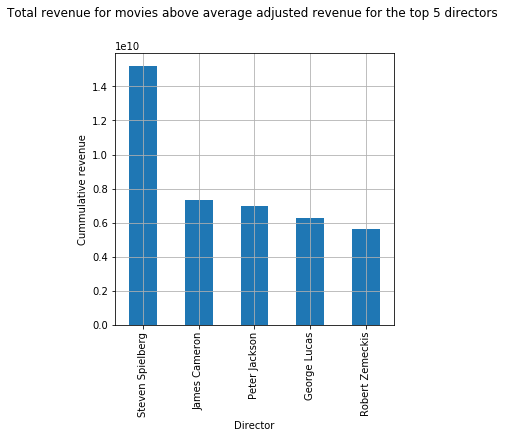

In [23]:
#visual representation for top 5 directors based on cummlative top movie revenue
top_5_directors.plot(kind = 'bar', figsize = (5,5), grid = True)
plt.title("Total revenue for movies above average adjusted revenue for the top 5 directors \n \n")
plt.xlabel('Director')
plt.ylabel('Cummulative revenue')

Let's get the total movie count for the top directors to see how the count relates with the cummlative reveune

In [24]:
# top revenue directors movie count

directors_movie_count = df_top_adj_revenue_movies.groupby(['director'])['revenue_adj'].count().sort_values(ascending = False)

top5_revenue_director_movie_count = directors_movie_count.loc[['Steven Spielberg', 'James Cameron', 'Peter Jackson', 'George Lucas',
       'Robert Zemeckis']]

top5_revenue_director_movie_count

director
Steven Spielberg    27
James Cameron        7
Peter Jackson        8
George Lucas         5
Robert Zemeckis     14
Name: revenue_adj, dtype: int64

Text(0, 0.5, 'Total number of movies')

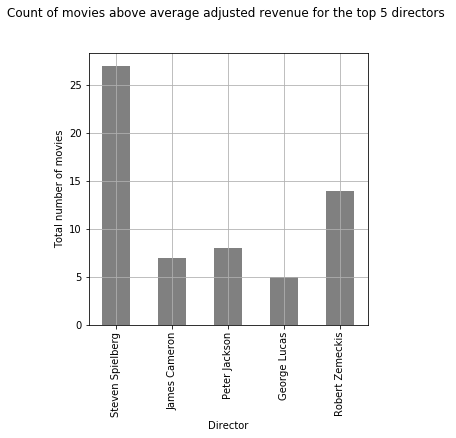

In [25]:
#visual representation for top 5 directors based on top movie revenue count
top5_revenue_director_movie_count.plot(kind = 'bar', figsize = (5,5), grid = True, color = 'grey')
plt.title("Count of movies above average adjusted revenue for the top 5 directors \n \n")
plt.xlabel('Director')
plt.ylabel('Total number of movies')

>>From the count chart, Steven Spielberg has directed more movies with higher adjusted revenue compared to the other top directors

### 2) How does the adjusted revenue correlate with the movie popularity, runtime and average vote

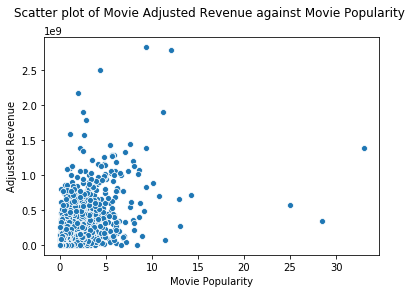

In [33]:
# plot adjusted revenue against popularity
sns.scatterplot(data=df_mdb,y = df_mdb['revenue_adj'], x = df_mdb['popularity'] )
plt.xlabel('Movie Popularity')
plt.ylabel('Adjusted Revenue')
plt.title('Scatter plot of Movie Adjusted Revenue against Movie Popularity \n')
plt.show()


>>From the scatter plot of Movie Adjusted Revenue against Movie Popularity there is no distinct correlation. The revenue generated from a movie can not be inferred from the movie populairty.

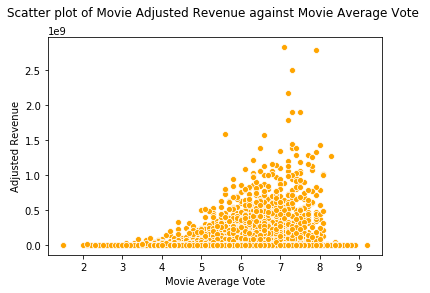

In [34]:
# plot adjusted revenue against movie vote average
sns.scatterplot(data=df_mdb, y = df_mdb['revenue_adj'], x = df_mdb['vote_average'], color = 'orange')
plt.xlabel('Movie Average Vote')
plt.ylabel('Adjusted Revenue')
plt.title('Scatter plot of Movie Adjusted Revenue against Movie Average Vote \n')
plt.show()

>>From the Scatter plot of Movie Adjusted Revenue against Movie Average Vote a quick glance may show that higher movie vote average may give a high revenue returns. This is not certain as a deep dive into the scatter plot shows movies with very high vote average having extremly low adjusted revenue.

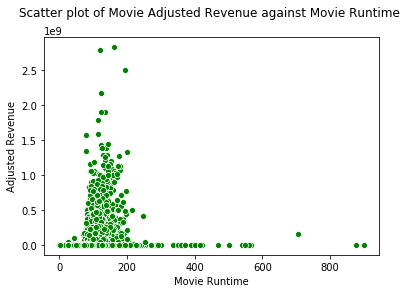

In [35]:
# plot adjusted revenue against movie runtime
sns.scatterplot(data=df_mdb, y = df_mdb['revenue_adj'], x = df_mdb['runtime'], color = 'green')
plt.xlabel('Movie Runtime')
plt.ylabel('Adjusted Revenue')
plt.title('Scatter plot of Movie Adjusted Revenue against Movie Runtime \n')
plt.show()

>>There is no correlation of the movie runtime having impact on the revenue generated by the movie based on the scatter plot of adjusted revenue against runtime

### Research Question 2  (Replace this header name!)
- Which genre of movie leads in generating revenue?
- Who are top directors in the genre with leading revenue generation?
- Which genre is more popular with viewers?

### Research Question 2  (Replace this header name!)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!